## King County House Sales Project Submission

Please fill out:
* Student name: Jon McCaffrey
* Student pace: full time
* Scheduled project review date/time: 10/28/22 15:00 EST
* Instructor name: Daniel Burdeno
* Blog post URL: https://medium.com/@jonmccaffrey524


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Initial imports

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Loaded data, initial EDA

In [3]:
! ls

LICENSE
README.md
data
jons_notebook.ipynb


In [4]:
df_hd = pd.read_csv('.\data\kc_house_data.csv')
df_hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# checking for null values
df_hd.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# obtaining statistics for numeric columns
df_hd.describe()
# noted likely outliers for bedrooms and sqft_lot15.  Will address below

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# looking at correlation for numeric portion of dataframe
df_hd.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


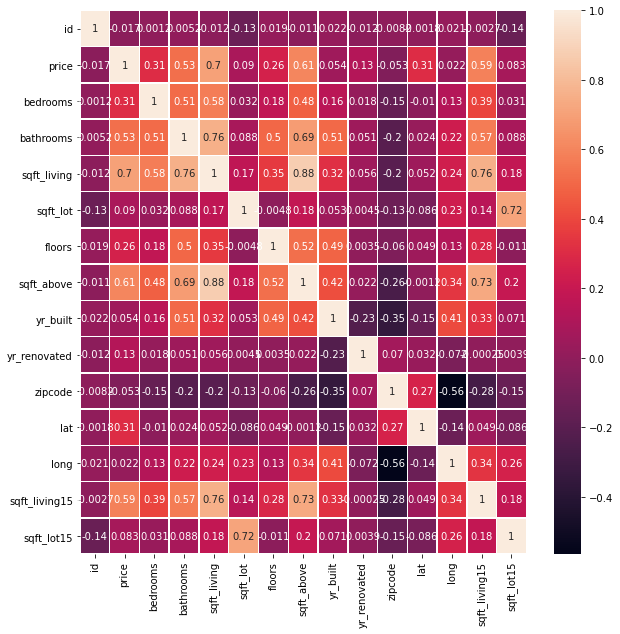

In [9]:
# producing a heatmap of correlations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_hd.corr(), annot=True, linewidths=.5, ax=ax);
# kind of tough to read though

# Looking for outliers in bedrooms

In [10]:
df_hd['bedrooms'].value_counts()
# reveals one house with '33' bedrooms

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
beds_outlier = df_hd.loc[df_hd['bedrooms'] > 11]
beds_outlier
# looks like the number '3' entered twice by mistake.  Will impute to '3'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [12]:
# Imputing 33 to 3
df_hd['bedrooms'] = df_hd['bedrooms'].replace([33], 3)

In [13]:
# checking that it's gone
df_hd['bedrooms'].describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

# Looking for outliers in sqft_lot15

In [14]:
df_hd['sqft_lot15'].describe()
# large difference between max and 75%

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [15]:
df_hd['sqft_lot15'].sort_values(ascending=False).head(25)

9705     871200
20436    858132
13451    560617
8655     438213
3797     434728
1717     425581
19141    422967
6685     411962
15606    392040
21415    392040
17645    386812
11171    380279
11552    360000
7287     358934
3532     339332
15543    335289
8756     326097
12656    325393
12993    325393
12741    320890
2409     311610
1253     310582
14674    298182
12481    297514
9122     297514
Name: sqft_lot15, dtype: int64

In [16]:
# calculating 95th percentile of 'sqft_lot15' as a potential cutoff for outliers
rvs_sqft_lot15 = stats.norm(loc=df_hd['sqft_lot15'].mean(), scale=df_hd['sqft_lot15'].std())
rvs_sqft_lot15.ppf(0.95)
# still seems pretty low compared to top 25 values above

57620.7482767692

In [17]:
# calculating interquartile range for sqft_lot15
IQR_sqft_lot15 = rvs_sqft_lot15.ppf(0.75) - rvs_sqft_lot15.ppf(0.25)
IQR_sqft_lot15

36792.663075707234

In [18]:
# calculating outliers via IQR range
upper_sqft_lot15 = rvs_sqft_lot15.ppf(0.75) + (1.5*IQR_sqft_lot15)
upper_sqft_lot15

86343.6096630133

In [19]:
lower_sqft_lot15 = rvs_sqft_lot15.ppf(0.25) - (1.5*IQR_sqft_lot15)
lower_sqft_lot15
# this yields a negative number, 
# so we won't be eliminating any values at the lower end of sqft_lot15 data

-60827.042639815634

In [20]:
df_lot = df_hd.copy()

In [21]:
# creating a dataframe (df_lot for reduced outliers of sqft_lot15) 
# with sqft_lot15 values above the upper_sqft_lot15 threshold removed
df_lot.drop(df_lot[df_lot['sqft_lot15'] >= upper_sqft_lot15].index, inplace=True)

In [22]:
df_lot

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [23]:
len(df_hd) - len(df_lot)

407

In [24]:
407 / len(df_hd)

0.01884520998286799

- That would remove 1.8% of values from original df_hd dataset

In [25]:
df_lot.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.119000e+04,2.119000e+04,21190.000000,21190.000000,21190.000000,2.119000e+04,21190.000000,21190.000000,21190.000000,17404.000000,21190.000000,21190.000000,21190.000000,21190.000000,21190.000000
mean,4.625523e+09,5.387073e+05,3.373195,2.111019,2067.552336,1.167585e+04,1.493275,1775.677867,1970.783860,84.063261,98078.597404,47.561635,-122.217350,1977.382256,9626.278528
std,2.874786e+09,3.675923e+05,0.905116,0.765878,903.772583,2.569551e+04,0.540375,813.901297,29.466688,400.923473,53.697265,0.137605,0.137894,679.775362,9483.693904
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,651.000000
25%,2.154918e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.001000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.475000,-122.329000,1480.000000,5080.000000
50%,3.992700e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.530000e+03,1.500000,1550.000000,1974.000000,0.000000,98070.000000,47.573300,-122.235000,1830.000000,7560.000000
75%,7.349100e+09,6.405000e+05,4.000000,2.500000,2530.000000,1.035875e+04,2.000000,2190.000000,1997.000000,0.000000,98118.000000,47.678600,-122.130000,2350.000000,9905.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.164794e+06,3.500000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,86248.000000


- Will save these changes into original dataset, and all stats tests and models from this point on will have those outlier sqft_lot15 values removed

In [26]:
df_hd.drop(df_hd[df_hd['sqft_lot15'] >= upper_sqft_lot15].index, inplace=True)

In [27]:
df_hd.shape

(21190, 21)

In [28]:
df_hd.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2330
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3786
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Investigate Price column

In [29]:
# determining correlation to price prior to any data cleaning
df_hd.corr()['price']

id              -0.014939
price            1.000000
bedrooms         0.314928
bathrooms        0.521774
sqft_living      0.701609
sqft_lot         0.093895
floors           0.252528
sqft_above       0.601561
yr_built         0.047669
yr_renovated     0.132744
zipcode         -0.052019
lat              0.311074
long             0.014250
sqft_living15    0.583662
sqft_lot15       0.150256
Name: price, dtype: float64

In [32]:
# sorting correlation in descending order, by absolute value
df_hd_corrs = df_hd.corr()['price'].map(abs).sort_values(ascending=False)
df_hd_corrs

# for initial modeling, focused on top 4 values of sqft_living, sqft_above, sqft_living15, and bathrooms

price            1.000000
sqft_living      0.701609
sqft_above       0.601561
sqft_living15    0.583662
bathrooms        0.521774
bedrooms         0.314928
lat              0.311074
floors           0.252528
sqft_lot15       0.150256
yr_renovated     0.132744
sqft_lot         0.093895
zipcode          0.052019
yr_built         0.047669
id               0.014939
long             0.014250
Name: price, dtype: float64

# Creating models based on correlations above

## Price and sqft_living

In [33]:
# defining variables, y and X_1
y = df_hd['price']
X_1 = sm.add_constant(df_hd['sqft_living'])

In [34]:
# fitting model and producing summary
sm.OLS(endog=y, exog=X_1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.054e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:32   Log-Likelihood:            -2.9443e+05
No. Observations:               21190   AIC:                         5.889e+05
Df Residuals:                   21188   BIC:                         5.889e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.13e+04   4492.724    -11.419      0.000   -6.01e+04   -4.25e+04
sqft_living   285.3659      1.991    143.323      0.000     281.463     289.269
==============================================================================
Omnibus:                    14349.170   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507461.884
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.320   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Noted R^2 0.493, low probability of F-statistic, low p-value of sqft_living
However, high JB, low prob  JB

## Price and sqft_above

In [35]:
X_2 = sm.add_constant(df_hd['sqft_above'])
sm.OLS(endog=y, exog=X_2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:32   Log-Likelihood:            -2.9685e+05
No. Observations:               21190   AIC:                         5.937e+05
Df Residuals:                   21188   BIC:                         5.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.627e+04   4841.438     11.623      0.000    4.68e+04    6.58e+04
sqft_above   271.6904      2.479    109.615      0.000     266.832     276.549
==============================================================================
Omnibus:                    16054.173   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692705.974
Skew:                           3.233   Prob(JB):                         0.00
Kurtosis:                      30.254   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Noted R^2 0.366 low probability of F-statistic, low p-value of sqft_above
However, high JB, low prob  JB again

## Price and sqft_living15

In [36]:
X_3 = sm.add_constant(df_hd['sqft_living15'])
sm.OLS(endog=y, exog=X_3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:32   Log-Likelihood:            -2.9720e+05
No. Observations:               21190   AIC:                         5.944e+05
Df Residuals:                   21188   BIC:                         5.944e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.539e+04   6307.482    -13.538      0.000   -9.78e+04    -7.3e+04
sqft_living15   315.6184      3.017    104.629      0.000     309.706     321.531
==============================================================================
Omnibus:                    19806.392   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1892101.117
Skew:                           4.220   Prob(JB):                         0.00
Kurtosis:                      48.517   Cond. No.                     6.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Noted R^2 0.343, low probability of F-statistic, low p-value of sqft_living15
However, high JB, low prob JB again

## Price and bathrooms

In [37]:
df_hd['bathrooms'].value_counts()

2.50    5273
1.00    3808
1.75    2989
2.25    2012
2.00    1890
1.50    1429
2.75    1162
3.00     736
3.50     712
3.25     569
3.75     149
4.00     127
4.50      97
4.25      73
0.75      69
4.75      22
5.00      20
5.25      13
5.50       9
1.25       9
6.00       5
5.75       4
0.50       4
6.25       2
6.75       2
6.50       2
8.00       1
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [38]:
# How can you have 0.25 of a bathroom?
# https://rosskaplan.com/2018/02/the-case-for-the-1-25-bath-or-the-1-375-bath/

In [39]:
X_4 = sm.add_constant(df_hd['bathrooms'])
sm.OLS(endog=y, exog=X_4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     7926.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:33   Log-Likelihood:            -2.9824e+05
No. Observations:               21190   AIC:                         5.965e+05
Df Residuals:                   21188   BIC:                         5.965e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.004e+04   6316.775      1.590      0.112   -2339.571    2.24e+04
bathrooms   2.504e+05   2812.894     89.030      0.000    2.45e+05    2.56e+05
==============================================================================
Omnibus:                    16976.134   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           874014.592
Skew:                           3.466   Prob(JB):                         0.00
Kurtosis:                      33.690   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Noted R^2 0.277, low probability of F-statistic, low p-value of bathrooms
However, high JB, low prob JB again

# Looking for Normality in comparisons above

## For numeric values of sqft_living, sqft_above, sqft_living15, and bathrooms

Andrew doing overall linear modeling and checking independence, as part of checking LINH assumptions

In [40]:
# creating smaller dataframe with only those 4 columns

df_norm = pd.concat([df_hd['sqft_living'], df_hd['sqft_above'], df_hd['sqft_living15'], df_hd['bathrooms']], axis=1)
df_norm.head()

,sqft_living,sqft_above,sqft_living15,bathrooms
0,1180,1180,1340,1.00
1,2570,2170,1690,2.25
2,770,770,2720,1.00
3,1960,1050,1360,3.00
4,1680,1680,1800,2.00


In [41]:
# instantiating with StandardScaler

X_norm_int = df_norm
ss = StandardScaler().fit(X_norm_int)

X_norm_int_scaled = ss.transform(X_norm_int)

In [42]:
# adding constant to X, defining y

X_norm_int_c = sm.add_constant(X_norm_int_scaled)
y = df_hd['price']

In [43]:
# creating and fitting the model

model = sm.OLS(endog=y, exog=X_norm_int_c).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     5308.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:33   Log-Likelihood:            -2.9426e+05
No. Observations:               21190   AIC:                         5.885e+05
Df Residuals:                   21185   BIC:                         5.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.387e+05   1784.769    301.836      0.000    5.35e+05    5.42e+05
x1          2.506e+05   4324.268     57.952      0.000    2.42e+05    2.59e+05
x2         -3.231e+04   3774.897     -8.559      0.000   -3.97e+04   -2.49e+04
x3          5.058e+04   2800.827     18.059      0.000    4.51e+04    5.61e+04
x4         -3663.0548   2723.904     -1.345      0.179   -9002.114    1676.005
==============================================================================
Omnibus:                    15106.241   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           648195.088
Skew:                           2.939   Prob(JB):                         0.00
Kurtosis:                      29.450   Cond. No.                         5.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

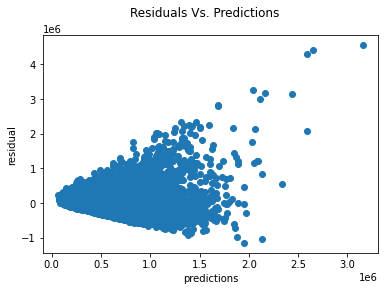

In [45]:
# scatterplot to assess general linearity

model_preds = model.predict(X_norm_int_c)
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

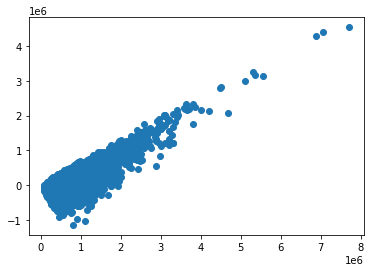

In [46]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids);

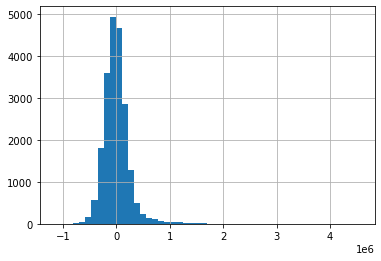

In [47]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids.hist(bins=50);

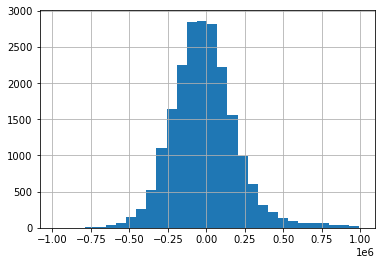

In [48]:
# a closer view

resids[abs(resids) < 1000000].hist(bins=30);

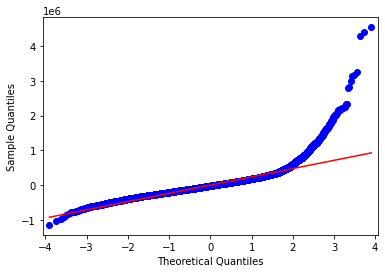

In [49]:
# QQ plot to assess normality as well.  This demonstrates significant divergences

sm.qqplot(resids, line='r');

In [50]:
# JB tests shows huge test statistic and tiny p-value.  
# So we would have to reject the null hypothesis 
# that the errors are normally distributed

model.summary().tables[2]

Omnibus:,15106.241,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,648195.088
Skew:,2.939,Prob(JB):,0.00
Kurtosis:,29.450,Cond. No.,5.25


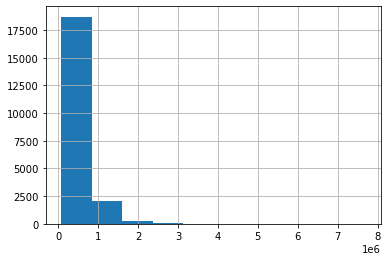

In [51]:
# note: very right-tailed.  
# It's possible that removing outliers at the high end could improve 
# normal distribution, 
# or perhaps using natural log will help make it more linear?

y.hist();

# Removing outliers at the high end of target value 'price'

Our initial review of assumptions for our linear regression model, based on the top 4 highest-correlated factors listed above, failed to find a normal distribution of errors.  We decided to further investigate the target value 'price' to see if removing outliers at the high end would improve our model

In [52]:
# looking at the properties of the top 25 highest priced homes
df_hd.sort_values(by='price', ascending=False).head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,NO,GOOD,...,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,YES,AVERAGE,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,NO,NONE,...,13 Mansion,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,YES,NaN,...,12 Luxury,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,YES,EXCELLENT,...,12 Luxury,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,YES,EXCELLENT,...,12 Luxury,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,YES,EXCELLENT,...,12 Luxury,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,NO,NONE,...,12 Luxury,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


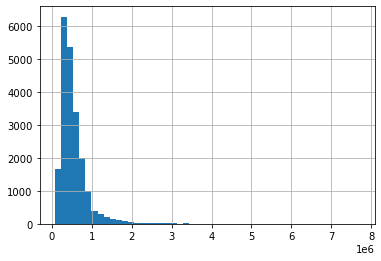

In [53]:
# quick histogram to visualize potential skewness
df_hd['price'].hist(bins=50);

In [54]:
# calculating 95th percentile of price as a potential cutoff for outliers
rvs_price = stats.norm(loc=df_hd['price'].mean(), scale=df_hd['price'].std())
rvs_price.ppf(0.95)

1143342.7754721555

In [55]:
# calculating interquartile range for price
IQR_price = rvs_price.ppf(0.75) - rvs_price.ppf(0.25)
IQR_price

495874.44485276565

In [56]:
# calculating outliers via IQR range
upper_price = rvs_price.ppf(0.75) + (1.5*IQR_price)
upper_price

1530456.1767277117

We decided to use the IQR calculation above for 'upper_price' as our cutoff for removing outliers, rather than th 95% calculation above

In [57]:
lower_price = rvs_price.ppf(0.25) - (1.5*IQR_price)
lower_price
# this yields a negative number, so we won't be eliminating any values at the lower end of price data

-453041.602683351

In [58]:
# creating a copy of df
df_lp = df_hd.copy()
df_lp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [59]:
# creating a dataframe (df_lp for 'lower price') with price values above the upper_price threshold removed
df_lp.drop(df_lp[df_lp['price'] >= upper_price].index, inplace=True)

In [60]:
df_lp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [61]:
len(df_hd) - len(df_lp)

484

In [62]:
484 / (len(df_hd))

0.02284096271826333

- That removed 484 values (2.3%)
- will keep df_lp as a separate dataframe for now to be able to compare to original full dataset if needed

# Now re-running models from above with price outliers removed

## Lower price and sqft_living

In [63]:
# defining variables, y and X_1
y = df_lp['price']
X_1_lp = sm.add_constant(df_lp['sqft_living'])

In [64]:
# fitting model and producing summary
sm.OLS(endog=y, exog=X_1_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.563e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:34   Log-Likelihood:            -2.8090e+05
No. Observations:               20706   AIC:                         5.618e+05
Df Residuals:                   20704   BIC:                         5.618e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         9.72e+04   3485.084     27.891      0.000    9.04e+04    1.04e+05
sqft_living   200.5157      1.604    125.001      0.000     197.371     203.660
==============================================================================
Omnibus:                     2891.298   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5382.414
Skew:                           0.896   Prob(JB):                         0.00
Kurtosis:                       4.739   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R^2 decreased!  Other values interpreted above remain consistent

## Lower price and sqft_above

In [65]:
X_2_lp = sm.add_constant(df_lp['sqft_above'])
sm.OLS(endog=y, exog=X_2_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     9240.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:34   Log-Likelihood:            -2.8290e+05
No. Observations:               20706   AIC:                         5.658e+05
Df Residuals:                   20704   BIC:                         5.658e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.821e+05   3617.175     50.330      0.000    1.75e+05    1.89e+05
sqft_above   183.8686      1.913     96.125      0.000     180.119     187.618
==============================================================================
Omnibus:                     3660.314   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7077.008
Skew:                           1.087   Prob(JB):                         0.00
Kurtosis:                       4.864   Cond. No.                     4.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- again R^2 decreased

## Lower price and sqft_living15

In [66]:
X_3_lp = sm.add_constant(df_lp['sqft_living15'])
sm.OLS(endog=y, exog=X_3_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 1.103e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:34   Log-Likelihood:            -2.8230e+05
No. Observations:               20706   AIC:                         5.646e+05
Df Residuals:                   20704   BIC:                         5.646e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.693e+04   4454.343     12.780      0.000    4.82e+04    6.57e+04
sqft_living15   228.0478      2.172    105.003      0.000     223.791     232.305
==============================================================================
Omnibus:                     4167.674   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9270.466
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       5.319   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R^2 with slight increase

## Lower price and bathrooms

In [67]:
X_4_lp = sm.add_constant(df_lp['bathrooms'])
sm.OLS(endog=y, exog=X_4_lp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     6355.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:34   Log-Likelihood:            -2.8395e+05
No. Observations:               20706   AIC:                         5.679e+05
Df Residuals:                   20704   BIC:                         5.679e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.563e+05   4580.790     34.132      0.000    1.47e+05    1.65e+05
bathrooms   1.658e+05   2079.379     79.716      0.000    1.62e+05     1.7e+05
==============================================================================
Omnibus:                     3438.374   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6205.817
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                       4.641   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R^2 also decreased here.  So that's 3 out of 4 highly correlated features that have decreased R^2 with the removal of the highest-priced 2.3% of homes.  

# Rechecking for Normality

In [68]:
# creating smaller dataframe with only those 4 columns

df_norm_lp = pd.concat([df_lp['sqft_living'], df_lp['sqft_above'], df_lp['sqft_living15'], df_lp['bathrooms']], axis=1)
df_norm_lp.head()

,sqft_living,sqft_above,sqft_living15,bathrooms
0,1180,1180,1340,1.00
1,2570,2170,1690,2.25
2,770,770,2720,1.00
3,1960,1050,1360,3.00
4,1680,1680,1800,2.00


In [69]:
# instantiating with StandardScaler

X_norm_lp = df_norm_lp
ss_lp = StandardScaler().fit(X_norm_lp)

X_norm_lp_scaled = ss_lp.transform(X_norm_lp)

In [70]:
# adding constant to X, defining y

X_norm_lp_c = sm.add_constant(X_norm_lp_scaled)
y_lp = df_lp['price']

In [71]:
# creating and fitting the model

model_lp = sm.OLS(endog=y_lp, exog=X_norm_lp_c).fit()

In [72]:
model_lp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     4315.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:34   Log-Likelihood:            -2.8045e+05
No. Observations:               20706   AIC:                         5.609e+05
Df Residuals:                   20701   BIC:                         5.609e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.009e+05   1282.159    390.638      0.000    4.98e+05    5.03e+05
x1           1.38e+05   2954.936     46.714      0.000    1.32e+05    1.44e+05
x2         -2.724e+04   2592.573    -10.508      0.000   -3.23e+04   -2.22e+04
x3          6.074e+04   2001.814     30.345      0.000    5.68e+04    6.47e+04
x4          4923.1173   1883.307      2.614      0.009    1231.689    8614.546
==============================================================================
Omnibus:                     2911.968   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5392.511
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                       4.726   Cond. No.                         4.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

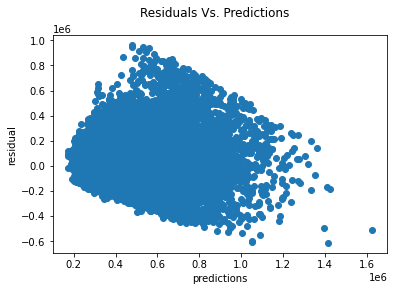

In [73]:
# scatterplot to assess general linearity

model_preds_lp = model_lp.predict(X_norm_lp_c)
resids_lp = y_lp - model_preds_lp

fig, ax = plt.subplots()

ax.scatter(model_preds_lp, resids_lp)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

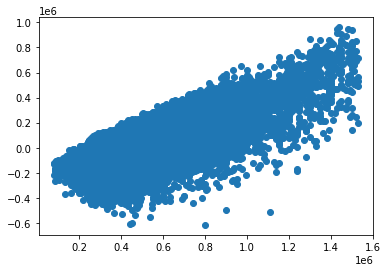

In [74]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y_lp, resids_lp);

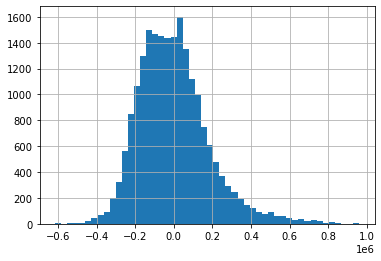

In [75]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_lp.hist(bins=50);

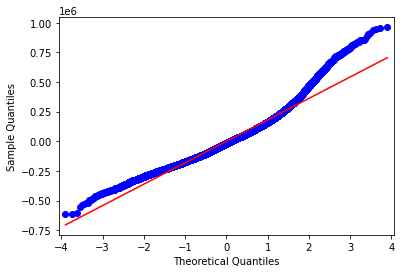

In [76]:
# QQ plot to assess normality as well.  This demonstrates significant divergences

sm.qqplot(resids_lp, line='r');

In [77]:
# JB test shows much reduced test-statistic, but still large and still a tiny p-value.  So we would have to reject the null hypothesis 
# that the errors are normally distributed.  Cond. No.  slightly improved but let's investigate the other numeric features
# that we've been focusing on (sqft_living, sqft_above, sqft_living15, and bathrooms)

model_lp.summary().tables[2]

Omnibus:,2911.968,Durbin-Watson:,1.973
Prob(Omnibus):,0.000,Jarque-Bera (JB):,5392.511
Skew:,0.904,Prob(JB):,0.00
Kurtosis:,4.726,Cond. No.,4.93


# Checking for outliers in subset numeric columns

In [78]:
# returning to original data set, not the 'lower price' dataframe
df_num = pd.concat([df_hd['price'], df_hd['sqft_living'], df_hd['sqft_above'], df_hd['sqft_living15'], df_hd['bathrooms']], axis=1)
df_num.head()               

,price,sqft_living,sqft_above,sqft_living15,bathrooms
0,221900.0,1180,1180,1340,1.00
1,538000.0,2570,2170,1690,2.25
2,180000.0,770,770,2720,1.00
3,604000.0,1960,1050,1360,3.00
4,510000.0,1680,1680,1800,2.00


In [79]:
df_num.corr()['price']

price            1.000000
sqft_living      0.701609
sqft_above       0.601561
sqft_living15    0.583662
bathrooms        0.521774
Name: price, dtype: float64

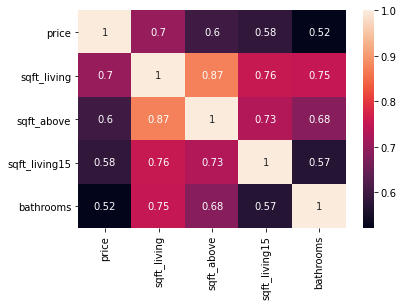

In [80]:
sns.heatmap(df_num.corr(), annot=True);
# I had missed how likely multicollinearity would be across many of these 
# variables.  

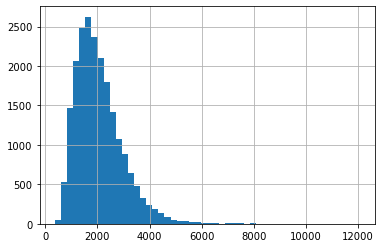

In [81]:
df_hd['sqft_living'].hist(bins=50);

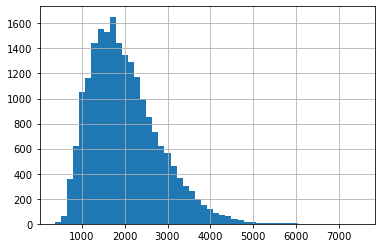

In [82]:
df_lp['sqft_living'].hist(bins=50);

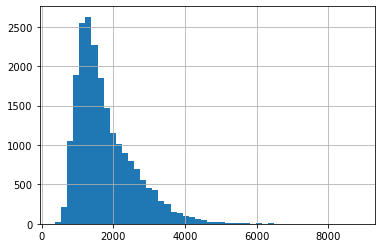

In [83]:
df_hd['sqft_above'].hist(bins=50);

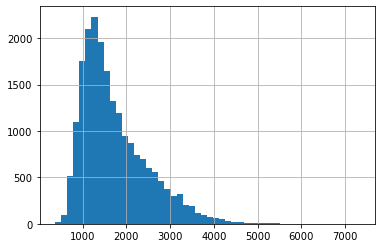

In [84]:
df_lp['sqft_above'].hist(bins=50);

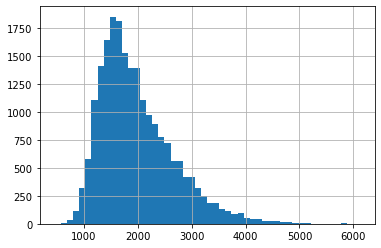

In [85]:
df_hd['sqft_living15'].hist(bins=50);

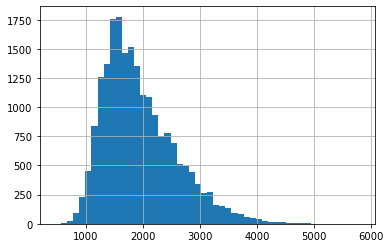

In [86]:
df_lp['sqft_living15'].hist(bins=50);

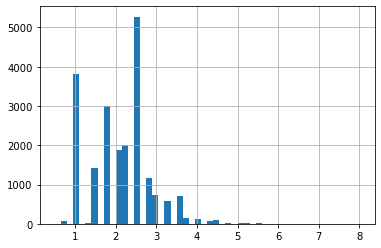

In [87]:
df_hd['bathrooms'].hist(bins=50);

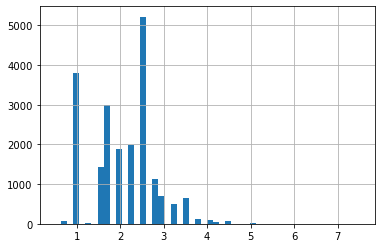

In [88]:
df_lp['bathrooms'].hist(bins=50);

# Investigating potential comparisons based on resale

- Looking at how many house id's are repeated in the dataframe, indicating resale

In [89]:
resale = df_hd['id'].value_counts()
type(resale)

pandas.core.series.Series

In [90]:
len(df_hd['id']) - df_hd['id'].nunique()

175

In [91]:
resale[:180]

795000620     3
8910500150    2
251300110     2
7409700215    2
2023049218    2
             ..
5450300010    1
8562780800    1
5631500905    1
6154900095    1
2770601677    1
Name: id, Length: 180, dtype: int64

In [92]:
# Andrew has the rest in his notebook

# Investigating categorical variables

- would multilinear regression between only ONE of the numeric variables above, and a categorical variable that we haven't worked with yet, yield a higher R^2 than without multicollinearity?

In [93]:
df_hd['grade'].value_counts()

7 Average        8847
8 Good           5981
9 Better         2529
6 Low Average    2006
10 Very Good     1091
11 Excellent      380
5 Fair            234
12 Luxury          81
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [94]:
df_hd['condition'].value_counts()

Average      13745
Good          5574
Very Good     1680
Fair           162
Poor            29
Name: condition, dtype: int64

In [95]:
df_hd['waterfront'].value_counts()
# has a lot of nulls (seen with initial EDA) and vast majority of values are NOs

NO     18717
YES      143
Name: waterfront, dtype: int64

- Should we treat zip code as a categorical value?  Then associate price to each zip code?  There are 70 (!) total
- Also considering creating calculations of lat & long relative to a defined lat & long of Seattle city center to investigate price differences relative to distance from city center
- After all, real estate is all about "location, location, location"

In [96]:
zips = df_hd['zipcode'].value_counts()
zips

98103    602
98115    583
98052    573
98117    553
98034    545
        ... 
98010     85
98070     77
98148     57
98024     53
98039     50
Name: zipcode, Length: 70, dtype: int64

In [97]:
zips[:50]

98103    602
98115    583
98052    573
98117    553
98034    545
98038    545
98042    537
98118    507
98023    499
98006    498
98133    493
98059    462
98058    447
98155    446
98074    438
98033    432
98125    409
98056    406
98027    377
98053    366
98001    361
98075    359
98126    354
98144    343
98106    335
98116    330
98029    320
98199    317
98004    317
98092    314
98065    304
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98031    273
98168    269
98112    269
98072    268
98055    268
98107    266
98136    263
98178    262
98030    255
98177    254
98166    253
98105    229
Name: zipcode, dtype: int64

- Andrew to investigate condition, I'll take grade.  I'll dummy out grade just relative to price first

## Creating a dataframe of only price and grade, from original data set with ALL sale prices

In [98]:
df_price_grade = pd.concat([df_hd['price'], df_hd['grade']], axis=1)
df_price_grade

,price,grade
0,221900.0,7 Average
1,538000.0,7 Average
2,180000.0,6 Low Average
3,604000.0,7 Average
4,510000.0,8 Good
...,...,...
21592,360000.0,8 Good
21593,400000.0,8 Good
21594,402101.0,7 Average
21595,400000.0,8 Good


In [99]:
dummy_price_grade = pd.get_dummies(df_price_grade, drop_first=True)
dummy_price_grade

,price,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,0,0,0,0,0,0,0,1,0,0
1,538000.0,0,0,0,0,0,0,0,1,0,0
2,180000.0,0,0,0,0,0,0,1,0,0,0
3,604000.0,0,0,0,0,0,0,0,1,0,0
4,510000.0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,0,0,0,0,0,0,0,0,1,0
21593,400000.0,0,0,0,0,0,0,0,0,1,0
21594,402101.0,0,0,0,0,0,0,0,1,0,0
21595,400000.0,0,0,0,0,0,0,0,0,1,0


In [100]:
dummy_price_grade.corr()['price']

price                  1.000000
grade_11 Excellent     0.355178
grade_12 Luxury        0.284050
grade_13 Mansion       0.213809
grade_3 Poor          -0.005171
grade_4 Low           -0.031746
grade_5 Fair          -0.083678
grade_6 Low Average   -0.208914
grade_7 Average       -0.314208
grade_8 Good           0.007303
grade_9 Better         0.237576
Name: price, dtype: float64

- Unsurprisingly, the highest grades are positively correlated with price, but interestingly 'Average' is slightly negatively correlated and yet 'Better' is positively correlated.  What would it take for a home to bump from average to better?

- https://budgeting.thenest.com/difference-value-appraisal-good-vs-average-23510.html
- https://www.sapling.com/12067706/grade-mean-tax-assessment#:~:text=Grade%20is%20an%20evaluation%20of%20the%20construction%20materials,Entry-level%20appraisers%20usually%20make%20the%20initial%20grade%20estimate.

## Starting to compare numeric variables investigated above to this price/grade dummy set

In [101]:
df_p_g_sqft_living = pd.concat([dummy_price_grade, df_hd['sqft_living']], axis=1)

In [102]:
df_p_g_sqft_living.corr()['sqft_living']
# price is still the highest correlation.  Would it be different if I created subsets of sqft_living?
# Note a big jump from 'average' to 'better' again

price                  0.701609
grade_11 Excellent     0.344251
grade_12 Luxury        0.224446
grade_13 Mansion       0.148467
grade_3 Poor          -0.011764
grade_4 Low           -0.054810
grade_5 Fair          -0.126975
grade_6 Low Average   -0.314599
grade_7 Average       -0.358639
grade_8 Good           0.077861
grade_9 Better         0.321034
sqft_living            1.000000
Name: sqft_living, dtype: float64

In [103]:
df_p_g_sqft_above = pd.concat([dummy_price_grade, df_hd['sqft_above']], axis=1)

In [104]:
df_p_g_sqft_above.corr()['sqft_above']
# same findings as above, with big jump from 'average' to 'good'

price                  0.601561
grade_11 Excellent     0.338316
grade_12 Luxury        0.208426
grade_13 Mansion       0.130448
grade_3 Poor          -0.010599
grade_4 Low           -0.048378
grade_5 Fair          -0.108299
grade_6 Low Average   -0.282455
grade_7 Average       -0.386549
grade_8 Good           0.065801
grade_9 Better         0.346434
sqft_above             1.000000
Name: sqft_above, dtype: float64

In [105]:
df_p_g_sqft_living15 = pd.concat([dummy_price_grade, df_hd['sqft_living15']], axis=1)

In [106]:
df_p_g_sqft_living15.corr()['sqft_living15']
# same

price                  0.583662
grade_11 Excellent     0.307520
grade_12 Luxury        0.174117
grade_13 Mansion       0.073918
grade_3 Poor          -0.006442
grade_4 Low           -0.025785
grade_5 Fair          -0.094886
grade_6 Low Average   -0.283655
grade_7 Average       -0.378040
grade_8 Good           0.078651
grade_9 Better         0.344214
sqft_living15          1.000000
Name: sqft_living15, dtype: float64

In [107]:
df_p_g_bathrooms = pd.concat([dummy_price_grade, df_hd['bathrooms']], axis=1)

In [108]:
df_p_g_bathrooms.corr()['bathrooms']
# same

price                  0.521774
grade_11 Excellent     0.242755
grade_12 Luxury        0.152537
grade_13 Mansion       0.096573
grade_3 Poor          -0.012208
grade_4 Low           -0.056135
grade_5 Fair          -0.137079
grade_6 Low Average   -0.366072
grade_7 Average       -0.312840
grade_8 Good           0.195257
grade_9 Better         0.264904
bathrooms              1.000000
Name: bathrooms, dtype: float64

- Would suggesting renovations such as adding a bathroom, or increasing by "X" sqft_living be significantly correlated with increased price?  Most likely.  By what percentage?  (Asking a predictive question, not needed).  What effect on price can we infer from an additional bathroom / sqft_living, how does that associate with grade or condition to strengthen overall model?

# Ordinal encoding 'condition'

- Let's return to the full data set, using ALL numeric variables...
    - minus the unnecessary ones of yr_renovated --> too many nulls
    - id --> unique ID but numbers are not significant
    - and zip code --> should be considered categorical as the numbers signify a category
- ...instead of focusing only on a smaller subset of higher correlated numeric variables (sqft_living, sqft_above, sqft_living15, and bathrooms)
- Ordinal encode condition (fewer categories, relatively more clear defnition than "grade")
- Concatenate into dataframe, standardize, run models, check assumptions

In [109]:
# creating df of only numerics
df_hd_numeric_all = df_hd.select_dtypes(include='number')

In [110]:
# checking shape
df_hd_numeric_all.shape

(21190, 15)

In [111]:
# dropping unnecessary numeric columns listed above
df_hd_numeric = df_hd_numeric_all.drop(['price', 'yr_renovated', 'zipcode', 'id'], axis=1)

In [112]:
# checking shape again
df_hd_numeric.shape

(21190, 11)

In [113]:
# review condition categories
df_hd['condition'].value_counts()

Average      13745
Good          5574
Very Good     1680
Fair           162
Poor            29
Name: condition, dtype: int64

In [114]:
# double check initial condition ratings for df_hd.head()
pd.options.display.max_columns = None
df_hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [115]:
df_hd.shape

(21190, 21)

In [116]:
# ordinal encoding condition
categories = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords = OrdinalEncoder(categories=categories)

In [117]:
df_hd['condition'].value_counts()

Average      13745
Good          5574
Very Good     1680
Fair           162
Poor            29
Name: condition, dtype: int64

In [118]:
# create dataframe of only 'condition'
cond_df = pd.DataFrame(df_hd['condition'])

In [119]:
# fit to ordinal encoder and transform
ords.fit(cond_df)
cond_ords = ords.transform(cond_df)
cond_ords

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [120]:
# create new dataframe with ordinal encoding taking place of grade
# how to title column?
cond_encoded = pd.DataFrame(ords.transform(cond_df), cond_df.index)
# reset cond_encoded dataframe to index of cond_df.  Then cond_encoded index = df_hd index prior to concat
# want to keep original total index of original hd_df.  Important for phase 3 tasks

In [121]:
# verifying ordinal values match category values
cond_encoded.value_counts()

2.0    13745
3.0     5574
4.0     1680
1.0      162
0.0       29
dtype: int64

In [122]:
cond_encoded.shape

(21190, 1)

In [123]:
# concatenate desired numeric variables and ordinal encoded condition
df_hd_num_ords = pd.concat([df_hd_numeric, cond_encoded], axis=1)
df_hd_num_ords.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,0
0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,2.0
1,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,2.0
2,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,2.0
3,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,4.0
4,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,2.0


In [124]:
# instantiating with StandardScaler
ss_ords = StandardScaler().fit(df_hd_num_ords)
hd_num_ords_scaled = ss_ords.transform(df_hd_num_ords)

In [125]:
df_hd_num_ords_scaled = pd.DataFrame(hd_num_ords_scaled, columns=df_hd_num_ords.columns)

In [126]:
# adding constant to X, defining y
df_hd_num_ords_c = sm.add_constant(df_hd_num_ords_scaled)
y = df_hd['price'].reset_index(drop=True)

In [127]:
# creating and fitting the model for all relevant numerics & 
# ordinal encoded condition
model_num_ords = sm.OLS(endog=y, exog=df_hd_num_ords_c).fit()

In [128]:
model_num_ords.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2966.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:38   Log-Likelihood:            -2.9116e+05
No. Observations:               21190   AIC:                         5.824e+05
Df Residuals:                   21177   BIC:                         5.825e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.387e+05   1542.707    349.196      0.000    5.36e+05    5.42e+05
bedrooms      -5.859e+04   1981.877    -29.561      0.000   -6.25e+04   -5.47e+04
bathrooms      4.769e+04   2790.146     17.091      0.000    4.22e+04    5.32e+04
sqft_living    2.075e+05   4367.446     47.505      0.000    1.99e+05    2.16e+05
sqft_lot       2385.6908   1841.738      1.295      0.195   -1224.255    5995.636
floors         1.182e+04   2198.981      5.374      0.000    7506.897    1.61e+04
sqft_above      2.92e+04   3957.672      7.379      0.000    2.14e+04     3.7e+04
yr_built      -6.638e+04   2194.292    -30.250      0.000   -7.07e+04   -6.21e+04
lat            8.223e+04   1605.066     51.233      0.000    7.91e+04    8.54e+04
long          -3.346e+04   1865.663    -17.934      0.000   -3.71e+04   -2.98e+04
sqft_living15   6.22e+04   2515.351     24.730      0.000    5.73e+04    6.71e+04
sqft_lot15    -9179.1762   1993.780     -4.604      0.000   -1.31e+04   -5271.216
0              2.077e+04   1689.863     12.291      0.000    1.75e+04    2.41e+04
==============================================================================
Omnibus:                    17148.261   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1114949.433
Skew:                           3.436   Prob(JB):                         0.00
Kurtosis:                      37.865   Cond. No.                         7.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

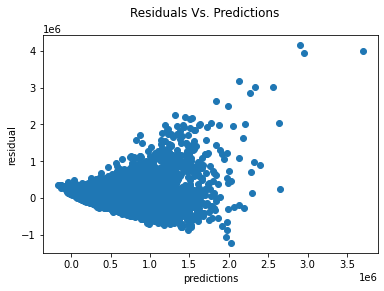

In [129]:
model_preds_num_ords = model_num_ords.predict(df_hd_num_ords_c)
resids_num_ords = y - model_preds_num_ords

fig, ax = plt.subplots()

ax.scatter(model_preds_num_ords, resids_num_ords)
ax.set_xlabel('predictions')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

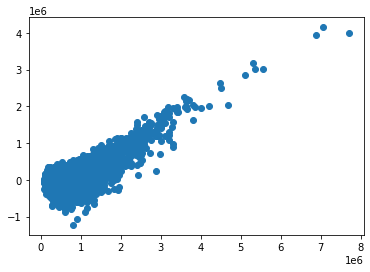

In [130]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids_num_ords);

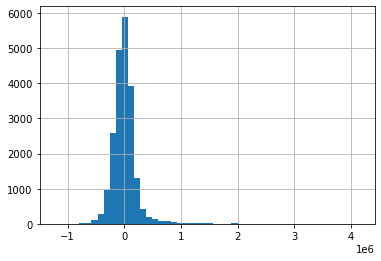

In [131]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_num_ords.hist(bins=50);

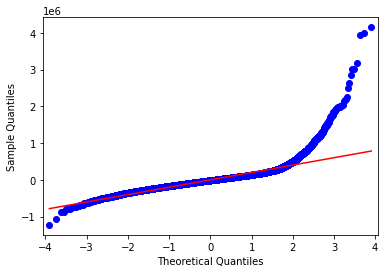

In [132]:
# QQ plot to assess normality as well.  This demonstrates significant 
# divergences

sm.qqplot(resids_num_ords, line='r');

In [133]:
model_num_ords.summary().tables[2]

Omnibus:,17148.261,Durbin-Watson:,2.000
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1114949.433
Skew:,3.436,Prob(JB):,0.00
Kurtosis:,37.865,Cond. No.,7.67


In [134]:
# looking at largest coeff - sqft_living
df_hd_num_ords['sqft_living'].mean()

2067.552336007551

In [135]:
df_hd_num_ords['sqft_living'].std()

903.7725828791163

In [136]:
# order of coefficients
# sqft_living
# lat (equates to )
# then neg of yr built
# sqft_living15

In [137]:
model_num_ords.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.387e+05,1542.707,349.196,0.000,5.36e+05,5.42e+05
bedrooms,-5.859e+04,1981.877,-29.561,0.000,-6.25e+04,-5.47e+04
bathrooms,4.769e+04,2790.146,17.091,0.000,4.22e+04,5.32e+04
sqft_living,2.075e+05,4367.446,47.505,0.000,1.99e+05,2.16e+05
sqft_lot,2385.6908,1841.738,1.295,0.195,-1224.255,5995.636
floors,1.182e+04,2198.981,5.374,0.000,7506.897,1.61e+04
sqft_above,2.92e+04,3957.672,7.379,0.000,2.14e+04,3.7e+04
yr_built,-6.638e+04,2194.292,-30.250,0.000,-7.07e+04,-6.21e+04
lat,8.223e+04,1605.066,51.233,0.000,7.91e+04,8.54e+04
long,-3.346e+04,1865.663,-17.934,0.000,-3.71e+04,-2.98e+04


In [138]:
# model_num_ords.outlier_test()

# Repeat assessment with lower price dataframe, no lat or long, and adding in distance to Seattle column from Andrew

In [139]:
# checking shape of newest df with dropped numerics, ord encoded condition
df_hd_num_ords.shape

(21190, 12)

In [140]:
# compared to original df.  All good for total rows
df_hd.shape

(21190, 21)

In [141]:
#create numeric df with 'id', 'yr_renovated' and 'zipcode' dropped. 
# BUT keeping price 
df_hd_num_price = df_hd_numeric_all.drop(['yr_renovated', 'zipcode', 'id'], axis=1)
df_hd_num_price.shape

(21190, 12)

In [142]:
# info from Andrew, with tweaks for my dataframe variable names
# installing and importing haversine library for geo-location calculations
!pip install haversine
import haversine as hs

In [143]:
# initializing and formatting location variables
loc1 = list(zip(df_hd_num_price['lat'], df_hd_num_price['long']))
loc2 = (47.6050, -122.3344)
# creating new dataframe from original df_hd with new column for house distance from downtown seattle
df_hd_w_loc = df_hd_num_price.copy()
df_hd_w_loc['Distance_from_DTSeattle'] = [hs.haversine((x,y), loc2, unit='mi') for x,y in loc1]
df_hd_w_loc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920


In [144]:
# adding in ordinal encoded condition from above
df_hd_ord_loc = pd.concat([df_hd_w_loc, cond_encoded], axis=1)
df_hd_ord_loc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920,2.0


In [145]:
# relevant numeric df (with price) and with ordinal encoded condition & loc
df_hd_ord_loc.shape

(21190, 14)

In [146]:
df_42 = df_hd_ord_loc.copy()

In [147]:
# now removing outlier high prices, as defined WAAAAAAY higher up in this JN
df_hd_ord_loc_lp = df_42.drop(df_42[df_42['price'] >= upper_price].index)
df_hd_ord_loc_lp.shape

(20706, 14)

In [148]:
df_hd_ord_loc_lp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920,2.0


In [149]:
# same 499 values removed as before
df_hd_ord_loc.shape[0] - df_hd_ord_loc_lp.shape[0]

484

In [150]:
df_x_drop = df_hd_ord_loc_lp.drop(['price', 'lat', 'long'], axis=1)

In [151]:
ss_ords_loc_lp = StandardScaler().fit(df_x_drop)
df_hd_ord_loc_lp_scaled = ss_ords_loc_lp.transform(df_x_drop)

In [152]:
df_hd_ord_loc_lp_scaled = pd.DataFrame(df_hd_ord_loc_lp_scaled, columns=df_x_drop.columns)

In [153]:
df_hd_ord_loc_lp_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,-0.394651,-1.476516,-1.019630,-0.228544,-0.899855,-0.733885,-0.534288,-0.939480,-0.408880,-0.617686,-0.629674
1,-0.394651,0.234996,0.681593,-0.165769,0.956054,0.577850,-0.670448,-0.397470,-0.197370,-0.521117,-0.629674
2,-1.511454,-1.476516,-1.521430,-0.057017,-0.899855,-1.277128,-1.283167,1.197590,-0.152388,-0.171442,-0.629674
3,0.722152,1.261903,-0.064987,-0.254174,-0.899855,-0.906133,-0.193889,-0.908508,-0.478001,-0.769856,2.451146
4,-0.394651,-0.107306,-0.407679,-0.132725,-0.899855,-0.071392,0.554989,-0.227123,-0.211832,0.317169,-0.629674


In [154]:
df_hd_ord_loc_lp_c = sm.add_constant(df_hd_ord_loc_lp_scaled)
y = df_hd_ord_loc_lp['price'].reset_index(drop=True)

In [155]:
df_hd_ord_loc_lp_c.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,1.0,-0.394651,-1.476516,-1.019630,-0.228544,-0.899855,-0.733885,-0.534288,-0.939480,-0.408880,-0.617686,-0.629674
1,1.0,-0.394651,0.234996,0.681593,-0.165769,0.956054,0.577850,-0.670448,-0.397470,-0.197370,-0.521117,-0.629674
2,1.0,-1.511454,-1.476516,-1.521430,-0.057017,-0.899855,-1.277128,-1.283167,1.197590,-0.152388,-0.171442,-0.629674
3,1.0,0.722152,1.261903,-0.064987,-0.254174,-0.899855,-0.906133,-0.193889,-0.908508,-0.478001,-0.769856,2.451146
4,1.0,-0.394651,-0.107306,-0.407679,-0.132725,-0.899855,-0.071392,0.554989,-0.227123,-0.211832,0.317169,-0.629674


In [156]:
model_num_ords_loc_lp = sm.OLS(endog=y, exog=df_hd_ord_loc_lp_c).fit()

In [157]:
# all numerics (- irrelevant), + distance to Seattle, +ordinal encoding
model_num_ords_loc_lp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3648.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:09:40   Log-Likelihood:            -2.7556e+05
No. Observations:               20706   AIC:                         5.511e+05
Df Residuals:                   20694   BIC:                         5.512e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5.009e+05   1012.920    494.472      0.000    4.99e+05    5.03e+05
bedrooms                 -2.55e+04   1313.580    -19.410      0.000   -2.81e+04   -2.29e+04
bathrooms                2.824e+04   1776.633     15.897      0.000    2.48e+04    3.17e+04
sqft_living              9.364e+04   2729.695     34.305      0.000    8.83e+04     9.9e+04
sqft_lot                 7705.1643   1204.682      6.396      0.000    5343.892    1.01e+04
floors                   1.136e+04   1477.452      7.687      0.000    8461.883    1.43e+04
sqft_above               3.131e+04   2514.561     12.453      0.000    2.64e+04    3.62e+04
yr_built                -2.545e+04   1486.938    -17.117      0.000   -2.84e+04   -2.25e+04
sqft_living15            7.106e+04   1630.674     43.577      0.000    6.79e+04    7.43e+04
sqft_lot15               8212.3265   1310.788      6.265      0.000    5643.080    1.08e+04
Distance_from_DTSeattle -1.057e+05   1240.201    -85.243      0.000   -1.08e+05   -1.03e+05
0                        1.987e+04   1107.209     17.949      0.000    1.77e+04     2.2e+04
==============================================================================
Omnibus:                     3143.501   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7890.303
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       5.494   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# coefficients from above model
model_num_ords_loc_lp.params

const                      500860.495122
bedrooms                   -25496.715269
bathrooms                   28242.803869
sqft_living                 93643.025790
sqft_lot                     7705.164336
floors                      11357.805822
sqft_above                  31314.936617
yr_built                   -25451.405942
sqft_living15               71059.359390
sqft_lot15                   8212.326469
Distance_from_DTSeattle   -105719.038873
0                           19872.912768
dtype: float64

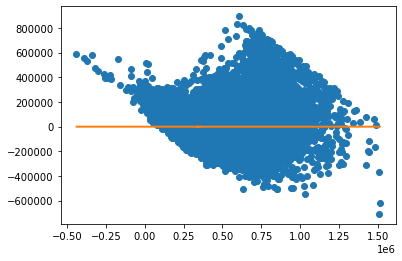

In [159]:
model_preds_num_ords_loc_lp = model_num_ords_loc_lp.predict(df_hd_ord_loc_lp_c)
resids_num_ords_loc_lp = y - model_preds_num_ords_loc_lp

# fig, ax = plt.subplots()

x=model_preds_num_ords_loc_lp
y=resids_num_ords_loc_lp

# ax.scatter(model_preds_num_ords_loc_lp, resids_num_ords_loc_lp)
plt.plot(x,y, "o")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

# ax.set_xlabel('predictions')
# ax.set_ylabel('residual')
# plt.suptitle('Residuals Vs. Predictions');

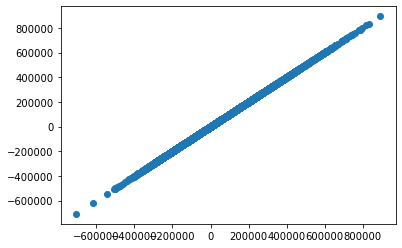

In [160]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids_num_ords_loc_lp);

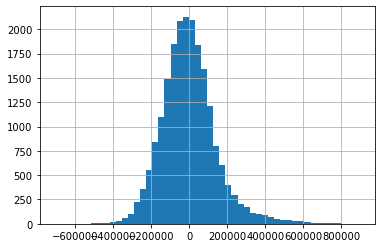

In [161]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_num_ords_loc_lp.hist(bins=50);

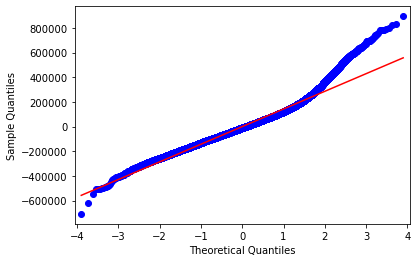

In [162]:
sm.qqplot(resids_num_ords_loc_lp, line='r');

# For a fair comparison to dataframe with ALL prices included

- and accounting for any relative difference in features, will recreate this model on original dataset (minus outliers from sqft_lot15)

In [163]:
df_hd2 = df_hd.copy()

In [164]:
df_hd2_numeric_all = df_hd2.select_dtypes(include='number')

In [165]:
df_hd2_num = df_hd_numeric_all.drop(['yr_renovated', 'zipcode', 'id', 'lat', 'long'], axis=1)
df_hd2_num.shape

(21190, 10)

In [166]:
df_hd2_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,1800,7503


In [167]:
df_hd2_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,2009,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,2014,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,2009,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,2004,1410,1287


In [168]:
# upper portion of table with ALL prices in, and no LOC
model_num_ords.summary().tables[0]

Dep. Variable:,price,R-squared:,0.627
Model:,OLS,Adj. R-squared:,0.627
Method:,Least Squares,F-statistic:,2966.
Date:,"Wed, 26 Oct 2022",Prob (F-statistic):,0.00
Time:,18:09:41,Log-Likelihood:,-2.9116e+05
No. Observations:,21190,AIC:,5.824e+05
Df Residuals:,21177,BIC:,5.825e+05
Df Model:,12,,
Covariance Type:,nonrobust,,


In [169]:
# most recent model, removed outlier prices and added LOC
model_num_ords_loc_lp.summary().tables[0]

Dep. Variable:,price,R-squared:,0.660
Model:,OLS,Adj. R-squared:,0.660
Method:,Least Squares,F-statistic:,3648.
Date:,"Wed, 26 Oct 2022",Prob (F-statistic):,0.00
Time:,18:09:41,Log-Likelihood:,-2.7556e+05
No. Observations:,20706,AIC:,5.511e+05
Df Residuals:,20694,BIC:,5.512e+05
Df Model:,11,,
Covariance Type:,nonrobust,,


In [170]:
# all prices, no LOC. All coeffs significant
model_num_ords.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.387e+05,1542.707,349.196,0.000,5.36e+05,5.42e+05
bedrooms,-5.859e+04,1981.877,-29.561,0.000,-6.25e+04,-5.47e+04
bathrooms,4.769e+04,2790.146,17.091,0.000,4.22e+04,5.32e+04
sqft_living,2.075e+05,4367.446,47.505,0.000,1.99e+05,2.16e+05
sqft_lot,2385.6908,1841.738,1.295,0.195,-1224.255,5995.636
floors,1.182e+04,2198.981,5.374,0.000,7506.897,1.61e+04
sqft_above,2.92e+04,3957.672,7.379,0.000,2.14e+04,3.7e+04
yr_built,-6.638e+04,2194.292,-30.250,0.000,-7.07e+04,-6.21e+04
lat,8.223e+04,1605.066,51.233,0.000,7.91e+04,8.54e+04
long,-3.346e+04,1865.663,-17.934,0.000,-3.71e+04,-2.98e+04


In [171]:
# most recent model, all prices, added LOC.  
model_num_ords_loc_lp.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.009e+05,1012.920,494.472,0.000,4.99e+05,5.03e+05
bedrooms,-2.55e+04,1313.580,-19.410,0.000,-2.81e+04,-2.29e+04
bathrooms,2.824e+04,1776.633,15.897,0.000,2.48e+04,3.17e+04
sqft_living,9.364e+04,2729.695,34.305,0.000,8.83e+04,9.9e+04
sqft_lot,7705.1643,1204.682,6.396,0.000,5343.892,1.01e+04
floors,1.136e+04,1477.452,7.687,0.000,8461.883,1.43e+04
sqft_above,3.131e+04,2514.561,12.453,0.000,2.64e+04,3.62e+04
yr_built,-2.545e+04,1486.938,-17.117,0.000,-2.84e+04,-2.25e+04
sqft_living15,7.106e+04,1630.674,43.577,0.000,6.79e+04,7.43e+04
sqft_lot15,8212.3265,1310.788,6.265,0.000,5643.080,1.08e+04


In [172]:
# model with ALL prices, no LOC
model_num_ords.summary().tables[2]

Omnibus:,17148.261,Durbin-Watson:,2.000
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1114949.433
Skew:,3.436,Prob(JB):,0.00
Kurtosis:,37.865,Cond. No.,7.67


In [173]:
# most recent model, outlier prices removed, added LOC
model_num_ords_loc_lp.summary().tables[2]

#JB number way down, DW still at 2, Omnibus & skew & kurtosis improved

Omnibus:,3143.501,Durbin-Watson:,2.008
Prob(Omnibus):,0.000,Jarque-Bera (JB):,7890.303
Skew:,0.855,Prob(JB):,0.00
Kurtosis:,5.494,Cond. No.,7.23


In [174]:
df_hd_ord_loc_lp_nolatlong = df_x_drop = df_hd_ord_loc_lp.drop(['lat', 'long'], axis=1)

In [175]:
df_hd_ord_loc_lp_nolatlong.corr()['price']

price                      1.000000
bedrooms                   0.317768
bathrooms                  0.484611
sqft_living                0.655820
sqft_lot                   0.082164
floors                     0.274406
sqft_above                 0.555495
yr_built                   0.051572
sqft_living15              0.589480
sqft_lot15                 0.125017
Distance_from_DTSeattle   -0.324448
0                          0.039088
Name: price, dtype: float64

In [176]:
df_hd_ord_loc_lp_nolatlong_corrs = df_hd_ord_loc_lp_nolatlong.corr()['price'].map(abs).sort_values(ascending=False)
df_hd_ord_loc_lp_nolatlong_corrs

price                      1.000000
sqft_living                0.655820
sqft_living15              0.589480
sqft_above                 0.555495
bathrooms                  0.484611
Distance_from_DTSeattle    0.324448
bedrooms                   0.317768
floors                     0.274406
sqft_lot15                 0.125017
sqft_lot                   0.082164
yr_built                   0.051572
0                          0.039088
Name: price, dtype: float64

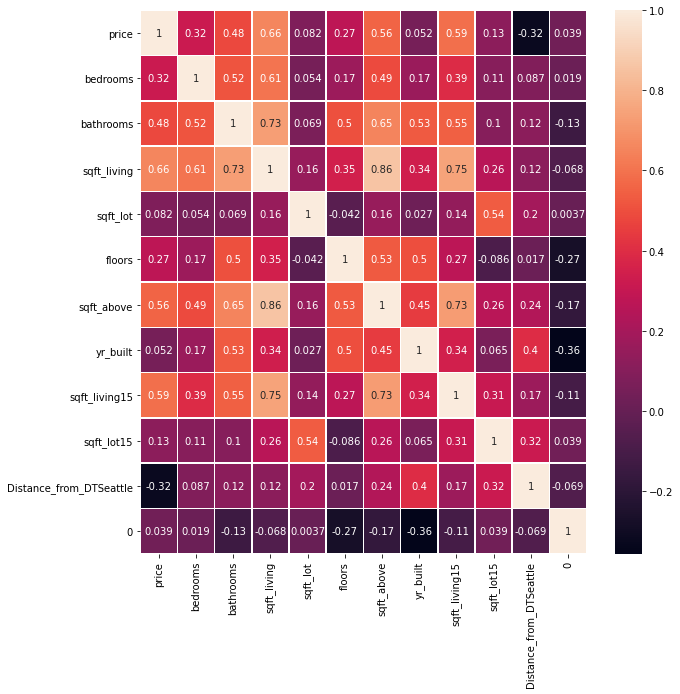

In [177]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_hd_ord_loc_lp_nolatlong.corr(), annot=True, linewidths=.5, ax=ax);

# Checking date range in data set

In [178]:
pd.to_datetime(df_hd['date']).min()

Timestamp('2014-05-02 00:00:00')

In [179]:
pd.to_datetime(df_hd['date']).max()

Timestamp('2015-05-27 00:00:00')

# Finding cutoff for living area

# Finding cutoff for bathrooms? bedrooms?

# Comparing 'good' vs 'averge' condition homes?

In [180]:
# go back to df_hd and remove outliers?  revisit assumptions, esp. homodes
# Andrew - resale df?
# visuals to tell our story
# start putting final JN together?  then README?

# Calculating how target feature coefficients translate to dollar amount changes in price

In [181]:
df_hd_ord_loc_lp.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
count,2.070600e+04,20706.000000,20706.000000,20706.000000,2.070600e+04,20706.000000,20706.000000,20706.000000,20706.000000,20706.000000,20706.000000,20706.000000,20706.000000,20706.000000
mean,5.008605e+05,3.353376,2.078371,2013.098039,1.144596e+04,1.484859,1733.881677,1970.695934,47.560300,-122.216968,1946.663624,9495.029991,11.439822,2.408770
std,2.498201e+05,0.895435,0.730366,817.078931,2.536101e+04,0.538833,754.744117,29.377977,0.138700,0.138906,645.759565,9404.026156,6.511199,0.649193
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,47.155900,-122.514000,460.000000,651.000000,0.717448,0.000000
25%,3.182500e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,1180.000000,1951.000000,47.471125,-122.331000,1470.000000,5029.250000,6.136998,2.000000
50%,4.447000e+05,3.000000,2.250000,1880.000000,7.497000e+03,1.000000,1530.000000,1974.000000,47.570700,-122.236000,1810.000000,7500.000000,10.314469,2.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,1.020000e+04,2.000000,2140.000000,1996.000000,47.679500,-122.129000,2310.000000,9794.000000,15.558620,3.000000
max,1.530000e+06,11.000000,7.500000,7480.000000,1.164794e+06,3.500000,7320.000000,2015.000000,47.777600,-121.315000,5790.000000,86248.000000,48.023035,4.000000


- Average (mean) house, in our model based on y-intercept value (const): $500,900

Other average features to be aware of:
    - bedrooms: 3 (3.35)
    - bathrooms: 2 (2.08)
    - sqft_living: 2,013 sq ft 
    - sqft_lot: 11,450 sq ft
    - floors: 1 (1.48)
    - sqft_above: 1,734 sq ft
    - yr_built: 1970
    - sqft_living15: 1,947 sq ft
    - sqft_lot15: 9,495 sq ft
    - distance from downtown Seattle: 11.44 miles
    - condition: average (2.41 out of 4)

In [182]:
df_hd_ord_loc_lp['sqft_living'].std()
# coef = 9.364 x 10^4 = $93,640

817.0789310520772

- Housing price increases by $93,640 for every 817 sqft_living increase

In [183]:
df_hd_ord_loc_lp['sqft_living15'].std()
# coef = 7.106 x 10^4 = $71,060

645.7595647094573

- Housing price increases by $71,060 for every 646 sqft_living15 increase

In [184]:
df_hd_ord_loc_lp['Distance_from_DTSeattle'].std()
# coef = - 1.057 x 10^5 = (-)$105,700

6.511199267844617

- Housing price *decreases* by $105,700 for every 6.5 miles away from city center